In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sympy import *
from scipy.stats import norm
from sklearn.metrics import r2_score
from scipy.stats import t
from scipy.optimize import curve_fit
from ExpDataAnalysis import ExpDataAnalysis as EDA

import matplotlib.colors
matplotlib.rcParams['font.family']='SimSun'  
matplotlib.rcParams['axes.unicode_minus']='False'

def ln(x):
    return np.log(x)/np.log(np.e)

ModuleNotFoundError: No module named 'ExpDataAnalysis'

# CC3+ 微位移振动

### 实验一  微小长度的多途径测量

><font size = 4 face='华文楷体'>以千分尺标定的微位移视为参考读数，与其余方法测量的作比较，可以得到其余的测量方法是否具备良好的线性关系，从而可以应用于微位移的测量中。但有一个问题是和其余同学的交流中，他们都认为测量肌张力系数所得到的值并不是线性的，但根据我们组拟合的结果发现这三种方法均具备良好的线性性质。同样，由胡克定理得到的弹簧拉力大小正比于位移大小，而由此的传感数值理论上也应该完美符合线性。同样，由于对应的参数缺失，我们只能得出这三种测微位移的方法所得到的都是线性结果，具体比例可以参考拟合直线，但误差却无法表示出来。

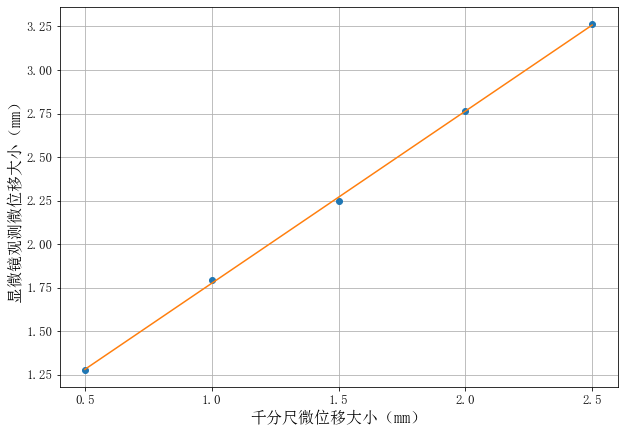

In [58]:
x = np.linspace(1,5,5)/2
y = np.array([1.276,1.795,2.247,2.765,3.263])
plt.subplots(figsize = (10,7))
plt.plot(x,y,'o',label='original data')
fy = np.poly1d(np.polyfit(x,y,1))
plt.plot(x,fy(x))
plt.xticks(np.linspace(1,5,5)/2,fontsize = 13);plt.yticks(fontsize = 13)
plt.xlabel('千分尺微位移大小（mm）',fontsize = 16);plt.ylabel('显微镜观测微位移大小（mm）',fontsize = 16)
plt.grid()

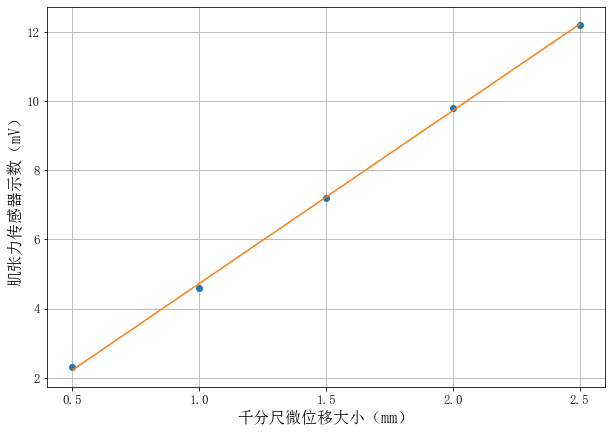

In [55]:
x = np.linspace(1,5,5)/2
y = np.array([2.3,4.6,7.2,9.8,12.2])
plt.subplots(figsize = (10,7))
plt.plot(x,y,'o',label='original data')
fy = np.poly1d(np.polyfit(x,y,1))
plt.plot(x,fy(x))
plt.xticks(np.linspace(1,5,5)/2,fontsize = 13);plt.yticks(fontsize = 13)
plt.xlabel('千分尺微位移大小（mm）',fontsize = 16);plt.ylabel('肌张力传感器示数（mV）',fontsize = 16)
plt.grid()

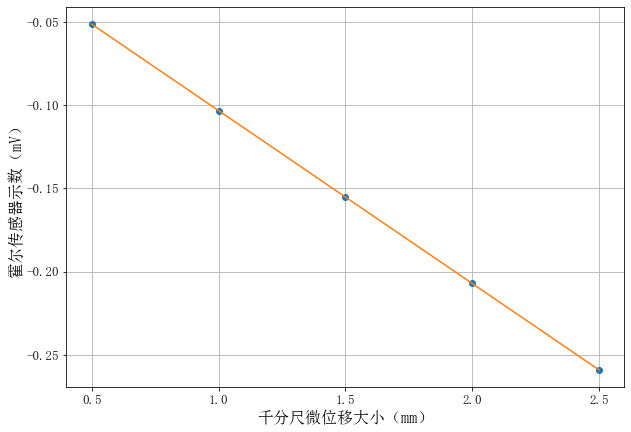

In [56]:
x = np.linspace(1,5,5)/2
y = np.array([-0.0514,-0.1032,-0.1552,-0.2070,-0.2592])
plt.subplots(figsize = (10,7))
plt.plot(x,y,'o',label='original data')
fy = np.poly1d(np.polyfit(x,y,1))
plt.plot(x,fy(x))
plt.xticks(np.linspace(1,5,5)/2,fontsize = 13);plt.yticks(fontsize = 13)
plt.xlabel('千分尺微位移大小（mm）',fontsize = 16);plt.ylabel('霍尔传感器示数（mV）',fontsize = 16)
plt.grid()

### 实验二  光杠杆测量微笑长度

><font size = 4 face = '华文楷体'>根据公式可以得到测量的微位移大小为：<font size = 4.5>$$\delta L = \frac{b}{2D} \times \delta n$$<font size = 4>  
    又测得的数据及其不确定度分别为：
>> <font size = 4.5>$\bar{b} = 6.38cm \quad \bar{\sigma} = 5.77e-3$  
    $\bar{b} = 176.85cm \quad \bar{\sigma} = 5.77e-3$  <font size = 4>   
    >代入误差传递公式,其中$\rho = 1$ $$\bar{\sigma_{\delta L}} = \Bigl(\frac{\bar{\sigma_b}}{2D} - \frac{b}{2D^2}\bar{\sigma_D}\Bigr)\delta n + \frac b{2D}\bar{\sigma_{\delta n}}$$
    
    
<font size = 4.55>$$$$<font size = 4> 

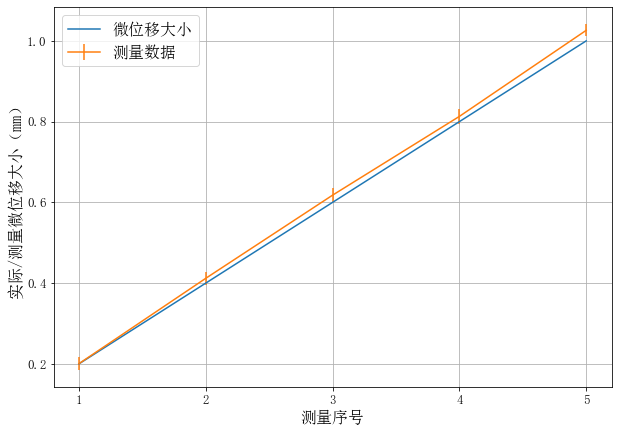

In [47]:
sta = np.array([0.2,0.4,0.6,0.8,1.0])
D = np.array([11.1,22.8,34.2,45.0,56.8])
fy = np.poly1d(np.polyfit(np.linspace(1,5,5),6.39*D/2/176.85,1))
err = 6.39*D/2/176.85 - fy(np.linspace(1,5,5))
error = 5.77e-3 * D *(1/2/176.85 - 6.39/(2 * 176.85**2))/sta *15
error = abs(error) + abs(err)
plt.subplots(figsize = (10,7))
plt.plot(np.linspace(1,5,5),sta,label = '微位移大小')

plt.errorbar(np.linspace(1,5,5),D * (6.39/2/176.85),fmt ='',yerr = error,label='测量数据')
plt.xticks(np.linspace(1,5,5),fontsize = 13);plt.yticks(fontsize = 13)
plt.xlabel('测量序号',fontsize = 16);plt.ylabel('实际/测量微位移大小（mm）',fontsize = 16)
plt.grid()
plt.legend(fontsize = 16)

### 实验三 光的等厚干涉测量微小厚度

<font face = '华文楷体' size =5>$\bar{L_{10}} = \cfrac15\sum^5_{i = 1} L_{10_i} = \cfrac15(1.356 + 1.323 + 1.324 + 1.336 + 1.329) = 1.334mm$  
    $\bar{\sigma_{L_{10}}} = \sqrt{\cfrac{\sum^5_{i = 1}( L_{10_i} - \bar{L_{10}})^2}{n(n - 1)}} = 6.055e-3mm$
     $\bar{L_{}} = \cfrac15\sum^5_{i = 1} L_i = \cfrac15(35.4 + 35.6 + 35.5 + 35.5 + 35.6) = 35.52mm$  
    $\bar{\sigma_{L}} = \sqrt{\cfrac{\sum^5_{i = 1}( L_i - \bar{L})^2}{n(n - 1)}} = 0.037mm$  
    劈尖厚度为：$e = 5\lambda\cfrac{\bar{L}}{L_{10}} = 0.0865mm$  
    $\bar{\sigma_e} = 5\lambda \Bigl(\cfrac{\bar{\sigma_L}}{\bar{L_{10}}} - \cfrac{\bar L}{\bar{L_{10}}^2}\bar{\sigma_{L10}} \Bigr) = -3.025e-4$  
    $\Rightarrow e = 0.0865 \pm 9.075e-4 mm$
    

$\cfrac{\bar L}{\bar{L_{10}}^2}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def light(x):
    return 6.39/(2*176.85)*x

# 光杠杆测微小位移

In [3]:
dx, dl = [11.2, 22.5, 33.8, 45.0, 56.2], []
for i in range(5):
    dl.append(light(dx[i]))
dl

[0.20234096692111955,
 0.4064885496183206,
 0.6106361323155215,
 0.8129770992366412,
 1.0153180661577608]

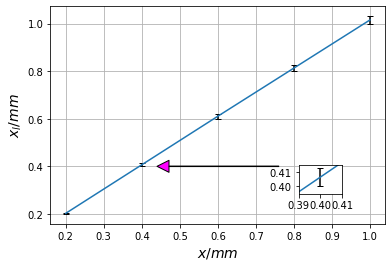

In [4]:
x = [0.2,0.4,0.6,0.8,1.0]

big_ax=plt.axes()
big_ax.errorbar(x, dl, yerr = np.array(dl)-np.array(x), capsize=3, ecolor = 'k')

big_ax.annotate('', fontsize = 7.8, xytext = (0.8, 0.4), xy=(0.4, 0.4),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
small_ax=plt.axes([0.7,0.23,0.1,0.1])
small_ax.errorbar(x[:3], dl[:3], yerr = (np.array(dl)-np.array(x))[:3], capsize=3, ecolor='k')

small_ax.set_ylim(0.395, 0.415)
small_ax.set_xlim(0.39, 0.41)

big_ax.set_ylabel(r'$x_{l}/mm$', fontsize = 14)
big_ax.set_xlabel(r'$x/mm$', fontsize = 14)
#plt.errorbar(x, dl, yerr = np.array(dl)-np.array(x), ecolor = 'k')
big_ax.grid()
plt.show()

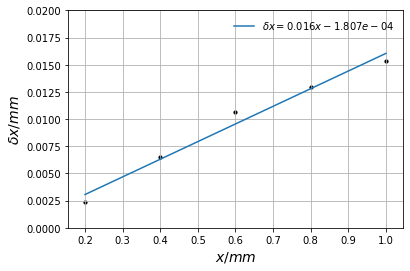

In [5]:
e_x = []
for i in range(5):
    e_x.append(dl[i]-x[i])
    
ylim(0, 0.02)
ylabel(r'$\delta x/mm$', fontsize = 14)
xlabel(r'$x/mm$', fontsize = 14)
plt.scatter(x, e_x, c= 'k', s = 10)
q = np.polyfit(x, e_x, 1)
plt.plot(x, np.polyval(q, x), label = r'$\delta x = {:.3f}x{:.3e}$'.format(q[0], q[1]))
plt.grid()
plt.legend(frameon = False)
plt.show()

In [6]:
f = np.poly1d(np.polyfit(x, e_x, 1))
R, ssr, sst = 0, 0, 0
for i in range(5):
    ssr += (f(x[i]) - np.mean(e_x))**2
    sst += (e_x[i] - np.mean(e_x))**2
R = ssr/sst
R

0.9787544433419718

# 等厚干涉测厚度

In [7]:
def thickness(l_10, l):
    return 5*632.8e-9*l/l_10

In [11]:
e_m

3.3247915787288405e-05

In [9]:
l = [47.920, 47.743, 47.269, 47.415, 47.437]
l_10 = [4.498, 4.498, 4.674, 4.442, 4.524]
e = []
for i in range(5):
    e.append(thickness(l_10[i], l[i]))
e

[3.3708065807025346e-05,
 3.358355980435749e-05,
 3.199809927257167e-05,
 3.377331382260243e-05,
 3.317654022988506e-05]

In [10]:
r, e_m = 0, np.mean(e)
for i in range(5):
    r += (e[i] - e_m)**2
r = (r/4)**(1/2)
r

7.361341306146832e-07

# 多方法测微小移动量

## 千分尺

In [12]:
x_q = [18.045, 17.680, 17.321, 17.006, 16.669, 16.438]

In [13]:
dx_q = []
for i in range(5):
    dx_q.append(x_q[0]-x_q[i+1])

## 测量显微镜

In [14]:
x_c = [1.517, 1.889, 2.236, 2.548, 2.890, 3.134]

In [15]:
dx_c = []
for i in range(5):
    dx_c.append(x_c[i+1]-x_c[0])

## 肌张力传感器

In [16]:
u_j = [0, 5.8, 9.8, 17.5, 27.4, 35.6]

In [17]:
du_j = []
for i in range(5):
    du_j.append((u_j[i+1]-u_j[0])/1000)

## 霍尔传感器

In [18]:
u_h = [0, -0.0341, -0.0688, -0.0986, -0.1307, -0.1531]

In [19]:
du_h = []
for i in range(5):
    du_h.append(u_h[0]-u_h[i+1])

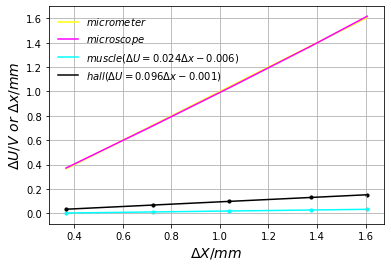

In [20]:
plt.plot(dx_q, dx_q, c = 'yellow', label = r'$micrometer$')

plt.plot(dx_q, dx_c, c = 'magenta', label = r'$microscope$')

x1 = np.polyfit(dx_q, du_j,1)
plt.scatter(dx_q, du_j, c = 'cyan', s = 10)
plt.plot(dx_q, np.polyval(x1,dx_q), c = 'cyan', label = r'$muscle(\Delta U = {:.3f}\Delta x{:.3f})$'.format(x1[0], x1[1]))

x2 = np.polyfit(dx_q, du_h,1)
plt.scatter(dx_q, du_h, c = 'black', s = 10)
plt.plot(dx_q, np.polyval(x2,dx_q), c = 'black', label = r'$hall(\Delta U = {:.3f}\Delta x{:.3f})$'.format(x2[0], x2[1]))

plt.xlabel(r'$\Delta X/mm$', fontsize = 14)
plt.ylabel(r'$\Delta U/V \ or \ \Delta x/mm $', fontsize = 14)
plt.legend(frameon = False)
plt.grid()
plt.show()

In [21]:
f1 = np.poly1d(x1)
R_1, ssr, sst = 0, 0, 0
for i in range(5):
    ssr += (f1(dx_q[i]) - np.mean(du_j))**2
    sst += (du_j[i] - np.mean(du_j))**2
R_1 = ssr/sst
R_1

0.9660073927389603

In [22]:
f2 = np.poly1d(x2)
R_2, ssr, sst = 0, 0, 0
for i in range(5):
    ssr += (f2(dx_q[i]) - np.mean(du_h))**2
    sst += (du_h[i] - np.mean(du_h))**2
R_2 = ssr/sst
R_2

0.9999851860059463

In [33]:
m = [0, 2, 5, 7]
u = [0, 21.4/1000, 53.2/1000, 74.3/1000]

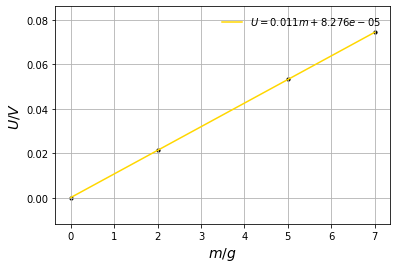

In [37]:
poly = np.polyfit(m, u, 1)
plt.scatter(m, u, c = 'k', s=10)
plt.plot(m, np.polyval(poly, m), c = 'gold', label = r'$U = {:.3f}m+{:.3e}$'.format(poly[0], poly[1]))

xlabel(r'$m/g$', fontsize = 14)
ylabel(r'$U/V$', fontsize = 14)
plt.grid()
plt.legend(frameon = False)
plt.show()

In [35]:
fm = np.poly1d(poly)
Rm, ssr, sst = 0, 0, 0
for i in range(4):
    ssr += (fm(m[i]) - np.mean(u))**2
    sst += (u[i] - np.mean(u))**2
Rm = ssr/sst
Rm

0.9999928730361748